<a href="https://colab.research.google.com/github/EnterTheBeginning/Machine-Learning/blob/master/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Working, Add more than 7 models
#Batch size = 32 vs 64 vs 128 for model 3 W/O Aug
#Model 5 winner

##Preprocessing

In [0]:
import numpy as np
import pandas as pd
import keras
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from keras.utils import np_utils
from keras.models import Sequential
from scipy.misc import toimage
from keras.layers import Dense, Activation, Flatten,Conv2D,MaxPooling2D,Dropout, BatchNormalization
from keras.optimizers import SGD, Adam, RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers

The goal is to recognize previously unseen images and assign them to one of the 10 classes.
Let us define a suitable deep net.

In [0]:
from keras.datasets import cifar10 
(X_train_original, y_train_original), (X_test_original, y_test_original) = cifar10.load_data()


In [0]:
#OneHotEncoding
y_train_hot = np_utils.to_categorical(y_train_original,10)
y_test = np_utils.to_categorical(y_test_original,10)


In [0]:
#Normalize
X_train_nor = X_train_original.astype('float32')
X_test_nor = X_test_original.astype('float32')
X_train_nor = (X_train_nor) / 255
X_test = (X_test_nor) / 255


In [0]:
#Manual Validation Divide
split = int(X_train_original.shape[0] * (4/5))

X_train = X_train_nor[:split]
y_train = y_train_hot[:split]

X_train_val = X_train_nor[split:]
y_train_val = y_train_hot[split:]


#Models

##Model 1: 69%

In [0]:
#Overfitting
#0.68 test 0.6904
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(32,(3,3),input_shape=(30,30,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()


In [78]:
model.fit(X_train, y_train, epochs = 20,batch_size= 32,verbose = 1,validation_data=[X_train_val,y_train_val])

score = model.evaluate(X_test,y_test,batch_size = 128,verbose = 1)
print("Test score: ", score[0])
print("Test accuracy: ", score[1])

NameError: ignored

##Model 2: 50%

In [0]:
#47%
model2 = Sequential()
model2.add(Conv2D(32,(3,3),input_shape=(32,32,3)))
model2.add(Conv2D(32,(3,3),input_shape=(30,30,3)))
model2.add(Conv2D(32,(3,3),input_shape=(28,28,3)))
model2.add(Flatten())
model2.add(Dense(512,activation = 'relu'))
model2.add(Dense(10,activation='softmax'))
model2.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])
model2.summary()
model2.fit(X_train,y_train,epochs=20 , batch_size = 128,verbose = 1,validation_data=[X_train_val,y_train_val])

score = model2.evaluate(X_test,y_test,batch_size = 128,verbose = 1)
print("Test score: ", score[0])
print("Test accuracy: ", score[1])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 26, 26, 32)        9248      
_________________________________________________________________
flatten_2 (Flatten)          (None, 21632)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 512)               11076096  
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5130      
Total params: 11,100,618
Trainable params: 11,100,618
Non-trainable params: 0
________________________________________________________________

KeyboardInterrupt: ignored

##Model 3 78%:

One way to improve the performance is to define a deeper network

In [0]:
#0.78 , test 0.76
model3 = Sequential()
model3.add(Conv2D(32,(3,3), input_shape=(32,32,3)))
model3.add(Activation('relu'))
model3.add(Conv2D(32,(3,3)))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Dropout(0.25))

model3.add(Conv2D(64,(3,3)))
model3.add(Activation('relu'))
model3.add(Conv2D(64,(3,3)))
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))

model3.add(Flatten())
model3.add(Dense(512))
model3.add(Activation('relu'))
model3.add(Dropout(0.25))

model3.add(Dense(10))
model3.add(Activation('softmax'))

#model3.summary()
model3.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])


In [89]:
model3.fit(X_train,y_train,epochs = 20,batch_size = 128, verbose = 1,validation_data=[X_train_val,y_train_val])
score = model3.evaluate(X_test,y_test,batch_size = 128,verbose = 1)
print("Test score: ", score[0])
print("Test accuracy: ", score[1])

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 13s 326us/step - loss: 1.6007 - acc: 0.4125 - val_loss: 1.3461 - val_acc: 0.5159
Epoch 2/20
40000/40000 [==============================] - 12s 299us/step - loss: 1.2478 - acc: 0.5539 - val_loss: 1.0784 - val_acc: 0.6258
Epoch 3/20
40000/40000 [==============================] - 12s 296us/step - loss: 1.0746 - acc: 0.6179 - val_loss: 0.9816 - val_acc: 0.6541
Epoch 4/20
40000/40000 [==============================] - 12s 296us/step - loss: 0.9593 - acc: 0.6603 - val_loss: 0.8733 - val_acc: 0.6960
Epoch 5/20
40000/40000 [==============================] - 12s 296us/step - loss: 0.8676 - acc: 0.6936 - val_loss: 0.8418 - val_acc: 0.7082
Epoch 6/20
40000/40000 [==============================] - 12s 295us/step - loss: 0.7951 - acc: 0.7170 - val_loss: 0.7627 - val_acc: 0.7351
Epoch 7/20
40000/40000 [==============================] - 12s 294us/step - loss: 0.7370 - acc: 0.7387 - val_loss: 0.

NameError: ignored

##Model 4:  Only One CNN Layer 67%

Our net will learn 32 convolutional filters, each of which with a 3 x 3 size. The output
dimension is the same one of the input shape, so it will be 32 x 32 and activation is ReLU

 After that we have a max-pooling
operation with pool size 2 x 2 and a dropout at 25%

In [56]:
#68% 0.6755 test
model4 = Sequential()
model4.add(Conv2D(32,(3,3),padding = 'same',input_shape =(32,32,3)))
model4.add(Activation('relu'))
model4.add(MaxPooling2D(pool_size= (2,2)))
model4.add(Dropout(0.25))

model4.add(Flatten())
model4.add(Dense(512))
model4.add(Activation('relu'))
model4.add(Dropout(0.5))
model4.add(Dense(10))
model4.add(Activation('softmax'))
model4.summary()

OPTIM = RMSprop()
model4.compile(loss = 'categorical_crossentropy', optimizer=OPTIM,metrics=['accuracy'])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_13 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 512)               4194816   
_________________________________________________________________
activation_14 (Activation)   (None, 512)               0         
__________

In [0]:
model4.fit(X_train,y_train,batch_size = 128, epochs =20 , verbose = 1,validation_data = [X_train_val,y_train_val])

score = model4.evaluate(X_test,y_test,batch_size = 128,verbose = 1)
print("Test score: ", score[0])
print("Test accuracy: ", score[1])

After defining the network, we can train the model. In this case, we split the data and
compute a validation set in addition to the training and testing sets

##Model 5: More Depth in CNN Layers 82% {Winner}

**Description**  
Kernel_regularizer  which allows to apply penalties on layer parameters during optimization. weights will decay after a while   
Activation = ELU &  
Batch Normalization   
ELU is far better than Relu since the model will underfit    
Dropout and Batch normalization will further improve the model

![alt text](https://www.researchgate.net/profile/Sepp_Hochreiter/publication/284579051/figure/fig1/AS:614057178578955@1523414048184/The-rectified-linear-unit-ReLU-the-leaky-ReLU-LReLU-a-01-the-shifted-ReLUs.png)

In [0]:
weight_decay = 0.0001
model5 = Sequential()
model5.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=(32,32,3)))
model5.add(Activation('elu'))
model5.add(BatchNormalization())
model5.add(Conv2D(32, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model5.add(Activation('elu'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D(pool_size=(2,2)))
model5.add(Dropout(0.2))
 
model5.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model5.add(Activation('elu'))
model5.add(BatchNormalization())
model5.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model5.add(Activation('elu'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D(pool_size=(2,2)))
model5.add(Dropout(0.3))
 
model5.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model5.add(Activation('elu'))
model5.add(BatchNormalization())
model5.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model5.add(Activation('elu'))
model5.add(BatchNormalization())
model5.add(MaxPooling2D(pool_size=(2,2)))
model5.add(Dropout(0.4))
 
model5.add(Flatten())
model5.add(Dense(10, activation='softmax'))
 
#model.summary()
opt_rms = keras.optimizers.rmsprop(lr=0.001,decay=0.000001)
model5.compile(loss='categorical_crossentropy', optimizer=opt_rms, metrics=['accuracy'])


In [106]:
model5.fit(X_train,y_train,batch_size = 128, epochs =20 , verbose = 1,validation_data = [X_train_val,y_train_val])

score = model5.evaluate(X_test,y_test,batch_size = 128,verbose = 1)
print("Test score: ", score[0])
print("Test accuracy: ", score[1])

Train on 40000 samples, validate on 10000 samples
Epoch 1/20
40000/40000 [==============================] - 20s 507us/step - loss: 1.9619 - acc: 0.4241 - val_loss: 1.5414 - val_acc: 0.5065
Epoch 2/20
40000/40000 [==============================] - 17s 435us/step - loss: 1.2526 - acc: 0.6038 - val_loss: 1.4192 - val_acc: 0.5993
Epoch 3/20
40000/40000 [==============================] - 17s 432us/step - loss: 1.0390 - acc: 0.6737 - val_loss: 1.0547 - val_acc: 0.6893
Epoch 4/20
40000/40000 [==============================] - 17s 433us/step - loss: 0.9164 - acc: 0.7158 - val_loss: 1.0578 - val_acc: 0.7077
Epoch 5/20
40000/40000 [==============================] - 17s 432us/step - loss: 0.8606 - acc: 0.7412 - val_loss: 0.9697 - val_acc: 0.7038
Epoch 6/20
40000/40000 [==============================] - 17s 432us/step - loss: 0.7766 - acc: 0.7633 - val_loss: 0.8647 - val_acc: 0.7392
Epoch 7/20
40000/40000 [==============================] - 17s 434us/step - loss: 0.7194 - acc: 0.7829 - val_loss: 0.

#Data Augmentations

##Data Augmentation 1[3rd Place]:

ImageDataGenerator class that is used to generate batches of tensor image data with real-time data augmentation.

In [0]:
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)
datagen.fit(X_train)

Augmented Images preview

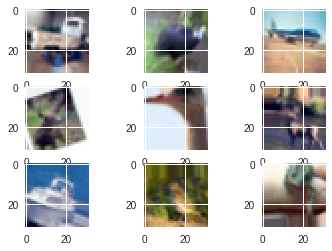

In [43]:
from matplotlib import pyplot as plt
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(toimage(X_batch[i].reshape(32, 32, 3)))
    plt.show()
    break

In [69]:
batch_size = 32
epochs = 2
model3.fit_generator(datagen.flow(X_train,y_train,batch_size = 4),steps_per_epoch = X_train.shape[0]//batch_size,epochs = epochs,verbose = 1, validation_data=(X_train_val,y_train_val))


Epoch 1/2
1250/1250 [==============================] - 20s 16ms/step - loss: 1.5308 - acc: 0.4434 - val_loss: 3.0842 - val_acc: 0.1957
Epoch 2/2
1250/1250 [==============================] - 20s 16ms/step - loss: 1.5222 - acc: 0.4452 - val_loss: 2.8828 - val_acc: 0.1800


In [57]:
batch_size = 32
epochs = 2
model4.fit_generator(datagen.flow(X_train,y_train,batch_size = 4),steps_per_epoch = X_train.shape[0]//batch_size,epochs = epochs,verbose = 1, validation_data=(X_train_val,y_train_val))

Epoch 1/2
1250/1250 [==============================] - 19s 15ms/step - loss: 2.1293 - acc: 0.2572 - val_loss: 2.2161 - val_acc: 0.1660
Epoch 2/2
1250/1250 [==============================] - 19s 15ms/step - loss: 1.9505 - acc: 0.3218 - val_loss: 2.3598 - val_acc: 0.1003


In [73]:
batch_size = 32
epochs = 2
model3.fit_generator(datagen.flow(X_train, y_train,
                                     batch_size=batch_size),
                        steps_per_epoch = X_train.shape[0]//batch_size,
                        epochs=epochs,
                        validation_data=(X_train_val, y_train_val),
                        workers=4)

Epoch 1/2
1250/1250 [==============================] - 40s 32ms/step - loss: 1.3268 - acc: 0.5173 - val_loss: 3.0898 - val_acc: 0.1802
Epoch 2/2
1250/1250 [==============================] - 40s 32ms/step - loss: 1.2658 - acc: 0.5443 - val_loss: 2.8309 - val_acc: 0.2410


##Data Augmentation 2[2nd Place]:

In [0]:
    datagen2 = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)

    # Compute quantities required for feature-wise normalization
    # (std, mean, and principal components if ZCA whitening is applied).
    datagen2.fit(X_train)


In [81]:
#Model 3 With improvement 
batch_size = 64
epochs = 10
model3.fit_generator(datagen2.flow(X_train, y_train,
                                     batch_size=batch_size),
                        steps_per_epoch = X_train.shape[0]//batch_size,
                        epochs=epochs,
                        validation_data=(X_train_val, y_train_val),
                        workers=4)

Epoch 1/10
1250/1250 [==============================] - 34s 28ms/step - loss: 1.0268 - acc: 0.6327 - val_loss: 0.9102 - val_acc: 0.6762
Epoch 2/10
1250/1250 [==============================] - 34s 27ms/step - loss: 0.9963 - acc: 0.6457 - val_loss: 0.8625 - val_acc: 0.6923
Epoch 3/10
1250/1250 [==============================] - 34s 27ms/step - loss: 0.9705 - acc: 0.6585 - val_loss: 0.8249 - val_acc: 0.7105
Epoch 4/10
1250/1250 [==============================] - 35s 28ms/step - loss: 0.9458 - acc: 0.6660 - val_loss: 0.7994 - val_acc: 0.7161
Epoch 5/10
1250/1250 [==============================] - 33s 27ms/step - loss: 0.9166 - acc: 0.6777 - val_loss: 0.7908 - val_acc: 0.7228
Epoch 6/10
1250/1250 [==============================] - 33s 27ms/step - loss: 0.8964 - acc: 0.6829 - val_loss: 0.8621 - val_acc: 0.7010
Epoch 7/10
1250/1250 [==============================] - 33s 27ms/step - loss: 0.8810 - acc: 0.6899 - val_loss: 0.7660 - val_acc: 0.7313
Epoch 8/10
1250/1250 [==========================

In [76]:
model4.fit_generator(datagen2.flow(X_train, y_train,
                                     batch_size=batch_size),
                        steps_per_epoch = X_train.shape[0]//batch_size,
                        epochs=epochs,
                        validation_data=(X_train_val, y_train_val),
                        workers=4)

Epoch 1/2
1250/1250 [==============================] - 34s 27ms/step - loss: 1.7675 - acc: 0.3663 - val_loss: 1.5193 - val_acc: 0.4635
Epoch 2/2
1250/1250 [==============================] - 34s 27ms/step - loss: 1.5745 - acc: 0.4387 - val_loss: 1.4204 - val_acc: 0.5061


In [80]:
model.fit_generator(datagen2.flow(X_train, y_train,
                                     batch_size=batch_size),
                        steps_per_epoch = X_train.shape[0]//batch_size,
                        epochs=epochs,
                        validation_data=(X_train_val, y_train_val),
                        workers=4)

Epoch 1/2
1250/1250 [==============================] - 33s 27ms/step - loss: 1.6235 - acc: 0.4156 - val_loss: 1.2727 - val_acc: 0.5545
Epoch 2/2
1250/1250 [==============================] - 33s 26ms/step - loss: 1.3343 - acc: 0.5259 - val_loss: 1.2630 - val_acc: 0.5578


In [0]:
model5.fit_generator(datagen2.flow(X_train, y_train,
                                     batch_size=batch_size),
                        steps_per_epoch = X_train.shape[0]//batch_size,
                        epochs=epochs,
                        validation_data=(X_train_val, y_train_val),
                        workers=4)
scores = model5.evaluate(X_test, y_test, batch_size=128, verbose=1)
print('\nTest result: %.3f loss: %.3f' % (scores[1]*100,scores[0]))

## Data Augmentation 3 [1st Place] {Winner}:

In [0]:
datagen3 = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )
datagen3.fit(X_train)

In [0]:
batch_size = 64
epochs = 20
model3.fit_generator(datagen3.flow(X_train, y_train,
                                     batch_size=batch_size),
                        steps_per_epoch = X_train.shape[0]//batch_size,
                        epochs=epochs,
                        validation_data=(X_train_val, y_train_val),
                        workers=4)
scores = model3.evaluate(X_test, y_test, batch_size=128, verbose=1)
print('\nTest result: %.3f loss: %.3f' % (scores[1]*100,scores[0]))

There is underfitting happening in here, Therefore It is the winner model for solving the Cifar10 Problem

In [108]:
batch_size = 64
epochs = 20
model5.fit_generator(datagen3.flow(X_train, y_train,
                                     batch_size=batch_size),
                        steps_per_epoch = X_train.shape[0]//batch_size,
                        epochs=epochs,
                        validation_data=(X_train_val, y_train_val),
                        workers=4)
scores = model5.evaluate(X_test, y_test, batch_size=128, verbose=1)
print('\nTest result: %.3f loss: %.3f' % (scores[1]*100,scores[0]))

Epoch 1/20
625/625 [==============================] - 36s 58ms/step - loss: 0.9193 - acc: 0.7484 - val_loss: 0.9866 - val_acc: 0.7607
Epoch 2/20
625/625 [==============================] - 35s 56ms/step - loss: 0.8695 - acc: 0.7597 - val_loss: 0.9183 - val_acc: 0.7764
Epoch 3/20
625/625 [==============================] - 34s 54ms/step - loss: 0.8406 - acc: 0.7658 - val_loss: 1.0983 - val_acc: 0.7800
Epoch 4/20
625/625 [==============================] - 35s 56ms/step - loss: 0.8302 - acc: 0.7713 - val_loss: 1.0941 - val_acc: 0.7678
Epoch 5/20
625/625 [==============================] - 35s 56ms/step - loss: 0.8123 - acc: 0.7752 - val_loss: 0.9381 - val_acc: 0.7648
Epoch 6/20
625/625 [==============================] - 34s 55ms/step - loss: 0.7958 - acc: 0.7833 - val_loss: 0.7144 - val_acc: 0.8082
Epoch 7/20
625/625 [==============================] - 34s 55ms/step - loss: 0.7756 - acc: 0.7893 - val_loss: 0.7770 - val_acc: 0.8143
Epoch 8/20
625/625 [==============================] - 34s 54ms